# Buoy live data notebook

First we'll load all the necessary packages

In [1]:
from siphon.simplewebservice.ndbc import NDBC
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_aval = NDBC.buoy_data_types('51002')

In [3]:
data_aval

{'txt': 'standard meteorological data',
 'spec': 'spectral wave summaries',
 'data_spec': 'raw spectral wave data',
 'swdir': 'spectral wave data (alpha1)',
 'swdir2': 'spectral wave data (alpha2)',
 'swr1': 'spectral wave data (r1)',
 'swr2': 'spectral wave data (r2)',
 'supl': 'supplemental measurements data'}

In [4]:
df_cur = NDBC.realtime_observations(buoy='51002')
df = df_cur[:288]

Text(0,0.5,'Wave height (m)')

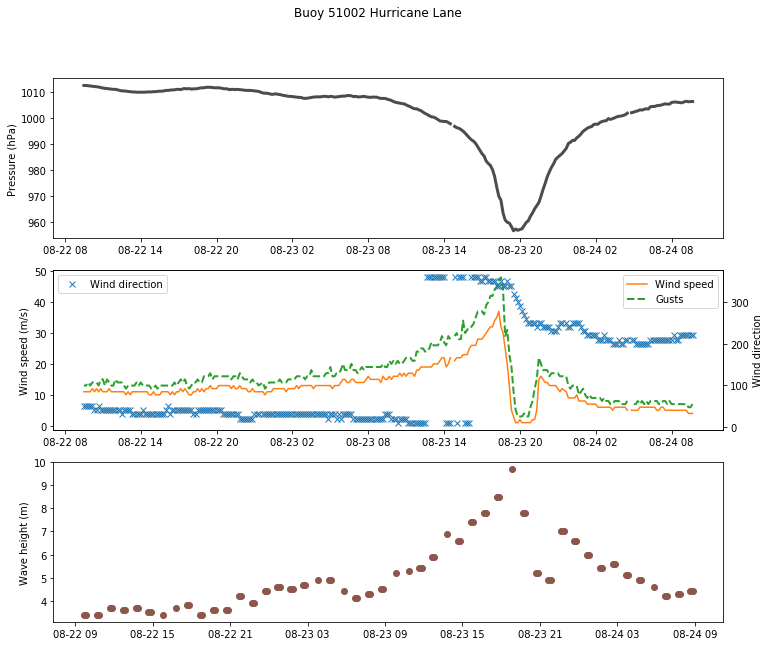

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12,10))
ax2b = ax2.twinx()

plt.suptitle('Buoy 51002 Hurricane Lane')

# Pressure
ax1.plot(df['time'], df['pressure'], color='black', lw=3, alpha=0.7)
ax1.set_ylabel('Pressure (hPa)')

# Wind speed, gusts, direction
ax2.plot(df['time'], df['wind_speed'], color ='tab:orange', label = 'Wind speed')
ax2.plot(df['time'], df['wind_gust'], color = 'tab:green',linestyle='--', label='Gusts', lw=2)
ax2b.plot(df['time'], df['wind_direction'], color = 'tab:blue', marker='x', ls='None', label='Wind direction')
ax2.set_ylabel('Wind speed (m/s)')
ax2b.set_ylabel('Wind direction')
ax2b.legend(loc='upper left')
ax2.legend()


# Wave height
ax3.plot(df['time'], df['wave_height'], color = 'tab:brown', linestyle ='--', marker='o')
ax3.set_ylabel('Wave height (m)')

In [24]:
fig.savefig('./plot.png')

In [37]:
print(max(df['wave_height'].loc[df['wave_height'].notnull()]))
print(min(df['pressure'].loc[df['pressure'].notnull()])) 
print(max(df['wind_gust'].loc[df['wind_gust'].notnull()]))
print(max(df['wind_speed'].loc[df['wind_speed'].notnull()]))

9.7
956.6
48.0
37.0
